   
# Advanced Video Analytics

The tutorial shows some techniques for developing advanced video analytics applications.

### Setup the environment variables, download model files and import dependencies

In [1]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import os
import time
import sys                                     
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent.parent))
from demoTools.demoutils import *
from openvino.inference_engine import IEPlugin, IENetwork
import cv2
# For labeling the image
from out_process import placeBoxes

In [2]:
!/opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


In [3]:
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name person-detection-retail-0013-fp16 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name face-detection-adas-0001 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name face-detection-adas-0001-fp16 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name head-pose-estimation-adas-0001-fp16 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name age-gender-recognition-retail-0013  -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name emotions-recognition-retail-0003-fp16  -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name facial-landmarks-35-adas-0002  -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name mobilenet-ssd -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name vehicle-license-plate-detection-barrier-0106 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name vehicle-attributes-recognition-barrier-0039 -o models
!/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name license-plate-recognition-barrier-0001 -o models


###############|| Downloading topologies ||###############

========= Downloading models/Retail/object_detection/pedestrian/rmnet_ssd/0013/dldt/person-detection-retail-0013-fp16.xml
... 100%, 152 KB, 1714 KB/s, 0 seconds passed

========= Downloading models/Retail/object_detection/pedestrian/rmnet_ssd/0013/dldt/person-detection-retail-0013-fp16.bin
... 100%, 1411 KB, 27991 KB/s, 0 seconds passed


###############|| Post processing ||###############


###############|| Downloading topologies ||###############

========= Downloading models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001.xml
... 100%, 88 KB, 1881 KB/s, 0 seconds passed

========= Downloading models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001.bin
... 100%, 4113 KB, 29032 KB/s, 0 seconds passed


###############|| Post processing ||###############


###############|| Downloading topologies ||###

In [4]:
! python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo_caffe.py --input_model models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel -o models/object_detection/common/mobilenet-ssd/FP32/ --scale 256 --mean_values [127,127,127]

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/u26212/30/iot-devcloud/smart_video_workshop/advanced-video-analytics/Python/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/home/u26212/30/iot-devcloud/smart_video_workshop/advanced-video-analytics/Python/models/object_detection/common/mobilenet-ssd/FP32/
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	T

## Part 1. Chaining models: Use mutiple models in an application

The Intel® Distribution of OpenVINO™ toolkit package includes security barrier sample which uses 3 models to detect cars, their number plates, color and number plate attributes from the input video or image of the cars. The sample demo script is provided in the Intel® Distribution of OpenVINO™ toolkit package to run the sample.


    
### 2. Run the executable for the security barrier sample with the mobilenet-ssd* model used in the first tutorial

In [5]:
! python3 security_barrier_camera.py -i car_1.bmp -m models/object_detection/common/mobilenet-ssd/FP32/mobilenet-ssd.xml   -l ~/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so -d CPU

[ INFO ] Initializing plugin for CPU device...
[ INFO ] Loading network files for Vehicle Detection
[ INFO ] Checking Vehicle Detection network inputs
[ INFO ] Checking Vehicle Detection network outputs
[ INFO ] Loading IR to the plugin...
[ INFO ] Starting inference ...
[ INFO ] To stop the demo execution press Esc button
[ INFO ] Execution successful


### 2.1.See the Output

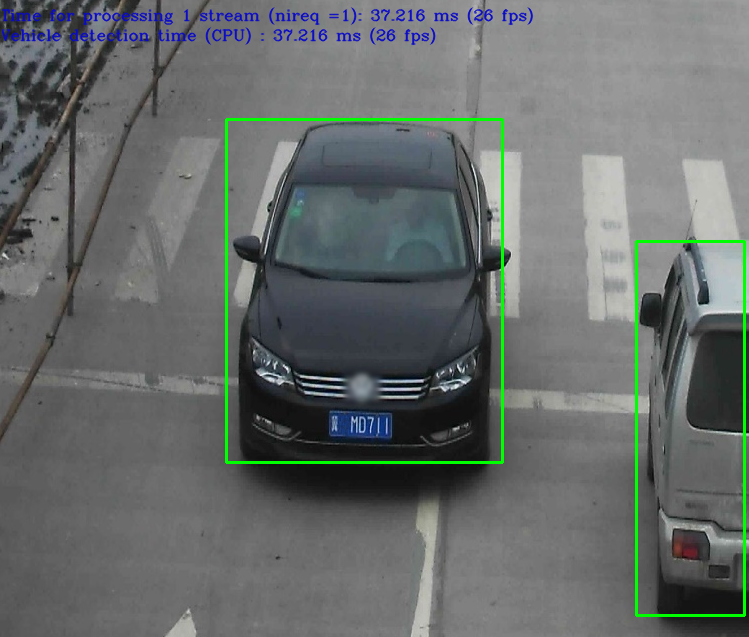

In [6]:
Image(filename='security.png')


### 3. Run the security camera sample with Intel optimized pre-trained models


Above script below run the security barrier camera example with Intel® pretrained models. In the script flags, you can see that the sample uses three pretrained models, vehicle-license-plate-detection-barrier, vehicle-attributes-recognition-barrier and license-plate-recognition-barrier to detect the car, it's make, color and license plate attributes. These pretrained models are optimized for particular tasks which yield better performance over generic object detection models. You can find more of such pretrained models under /opt/intel/openvino/deployment_tools/intel_models.

In [7]:
! python3 security_barrier_camera.py -i car_1.bmp  -m models/Security/object_detection/barrier/0106/dldt/vehicle-license-plate-detection-barrier-0106.xml -m_va models/Security/object_attributes/vehicle/resnet10_update_1/dldt/vehicle-attributes-recognition-barrier-0039.xml -m_lpr models/Security/optical_character_recognition/license_plate/dldt/license-plate-recognition-barrier-0001.xml -l ~/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so -d CPU

[ INFO ] Initializing plugin for CPU device...
[ INFO ] Loading network files for Vehicle Detection
[ INFO ] Checking Vehicle Detection network inputs
[ INFO ] Checking Vehicle Detection network outputs
[ INFO ] Initializing plugin for CPU device...
[ INFO ] Loading network files for Vehicle Attribute Detection
[ INFO ] Checking Vehicle Attribute Detection network inputs
[ INFO ] Checking Vehicle Attribute Detection network outputs
[ INFO ] Initializing plugin for CPU device...
[ INFO ] Loading network files for License Plate Recognition
[ INFO ] Checking License Plate Recognition network inputs
[ INFO ] Checking License Plate Recognition network outputs
[ INFO ] Loading IR to the plugin...
[ INFO ] Starting inference ...
[ INFO ] To stop the demo execution press Esc button
[ INFO ] Execution successful


Following car image will appear the at end of the above command execution. It shows the detection of the car, number plate, its attributes and color. You can view the file by running the cell below

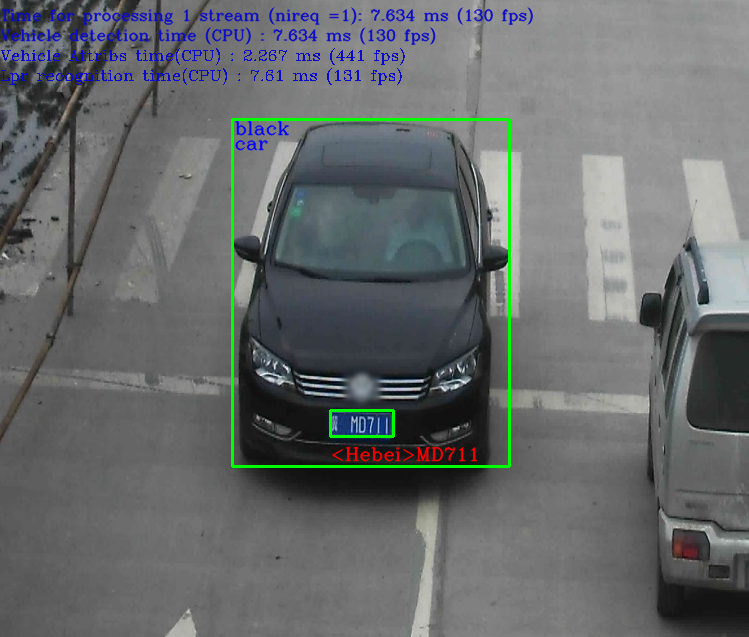

In [8]:
Image(filename='security.png')






## Part 2. Use multiple models on different hardware

### 0. Initialize the environmental variables

In [9]:
!/opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized



### 1. Let's look at the face detection sample from the Intel® Distribution of OpenVINO™ toolkit package

In [ ]:
!python3 interactive_face_detection.py -h

### 2. Set path to the Input Video

In [27]:
os.environ["VIDEO"] = "head-pose-female-male.mp4"



### 3. Run the face demo, face detection only, on the Intel® Movidius™ Neural Compute stick


#### Create Job Script 

We will run the workload on several DevCloud's edge compute nodes. We will send work to the edge compute nodes by submitting jobs into a queue. For each job, we will specify the type of the edge compute server that must be allocated for the job.

To pass the specific variables to the Python code, we will use following arguments:

* `-1`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Location of the output file 
* `-2`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Location of the input video

The job file will be executed directly on the edge compute node.

In [28]:
%%writefile infer_face.sh
cd $PBS_O_WORKDIR
mkdir -p $1
python3 interactive_face_detection.py   -m models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001-fp16.xml \
                            -i $2 \
                            -o $1 \
                            -d MYRIAD \
                            -l ~/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so 

Overwriting infer_face.sh


In [29]:
#Submit job to the queue
job_id_face = !qsub infer_face.sh -l nodes=1:idc004nc2:intel-ncs2 -F "results/ncs2_face/ $VIDEO" -N obj_det_face
print(job_id_face[0]) 
#Progress indicators
if job_id_face:
    progressIndicator('results/ncs2_face', 'i_progress.txt', "Inferencing", 0, 100)


48023.c003


In [30]:
videoHTML('Face Detection [MYRIAD] :', 
          ['results/ncs2_face/face.mp4'])


    
### 4. Now we add (to the face detection) also an age and gender detection, running on the CPU

In [31]:
%%writefile infer_ag.sh
cd $PBS_O_WORKDIR
mkdir -p $1
python3 interactive_face_detection.py   -m models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001-fp16.xml \
                            -i ${2} \
                            -o ${1} \
                            -d MYRIAD \
                            -d_ag CPU -m_ag models/Retail/object_attributes/age_gender/dldt/age-gender-recognition-retail-0013.xml \
                            -l ~/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so 

Overwriting infer_ag.sh


In [32]:
#Submit job to the queue
job_id_ag = !qsub infer_ag.sh -l nodes=1:idc004nc2:intel-ncs2 -F "results/ncs2_ag/ $VIDEO" -N obj_det_ag
print(job_id_ag[0]) 
#Progress indicators
if job_id_ag:
    progressIndicator('results/ncs2_ag', 'i_progress.txt', "Inferencing", 0, 100)

48024.c003


In [37]:
videoHTML('Face Detection [MYRIAD], Age/Gender [GPU] :', 
          ['results/ncs2_ag/face.mp4'])



### 5. Now we’ll add an head position detection, running on the GPU

In [33]:
%%writefile infer_hp.sh

#The default path for the job is your home directory, so we change directory to where the files are.
cd $PBS_O_WORKDIR
mkdir -p $1

python3 interactive_face_detection.py   -m models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001-fp16.xml\
                            -i ${2} \
                            -o ${1} \
                            -d MYRIAD \
                            -d_ag CPU -m_ag models/Retail/object_attributes/age_gender/dldt/age-gender-recognition-retail-0013.xml \
                            -d_hp GPU -m_hp models/Transportation/object_attributes/headpose/vanilla_cnn/dldt/head-pose-estimation-adas-0001-fp16.xml \
                            -l  ~/inference_engine_samples/intel64/Release/lib/libcpu_extension.so

Overwriting infer_hp.sh


In [34]:
#Submit job to the queue
job_id_hp = !qsub infer_hp.sh -l nodes=1:idc004nc2:intel-ncs2 -F "results/ncs2_hp/ $VIDEO" -N obj_det_hp
print(job_id_hp[0]) 
#Progress indicators
if job_id_hp:
    progressIndicator('results/ncs2_hp', 'i_progress.txt', "Inferencing", 0, 100)

48026.c003


In [38]:
videoHTML('Face Detection[MYRIAD] | Age/Gender[CPU] | Head Pose [GPU] :', 
          ['results/ncs2_hp/face.mp4' ]
          )

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/u26212/30/iot-devcloud/smart_video_workshop/advanced-video-analytics/Python/demoTools/demoutils.py", line 228, in _work
    os.remove(output_file)
FileNotFoundError: [Errno 2] No such file or directory: 'results/ncs2_ed/i_progress.txt'





### 6. Now we’ll add an emotion detector, running on the GPU

In [35]:
%%writefile infer_ed.sh
#The default path for the job is your home directory, so we change directory to where the files are.
cd $PBS_O_WORKDIR
mkdir -p $1
python3 interactive_face_detection.py   -m models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001-fp16.xml\
                            -i ${2} \
                            -o ${1} \
                            -d MYRIAD \
                            -d_ag CPU -m_ag models/Retail/object_attributes/age_gender/dldt/age-gender-recognition-retail-0013.xml \
                            -d_hp GPU -m_hp models/Transportation/object_attributes/headpose/vanilla_cnn/dldt/head-pose-estimation-adas-0001-fp16.xml \
                            -d_em GPU -m_em models/Retail/object_attributes/emotions_recognition/0003/dldt/emotions-recognition-retail-0003-fp16.xml \
                            -l ~/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so 

Overwriting infer_ed.sh


In [36]:
#Submit job to the queue
job_id_ed = !qsub infer_ed.sh -l nodes=1:idc004nc2:intel-ncs2 -F "results/ncs2_ed/ $VIDEO" -N obj_det_ed
print(job_id_ed[0]) 
#Progress indicators
if job_id_ed:
    progressIndicator('results/ncs2_ed', 'i_progress.txt', "Inferencing", 0, 100)

48034.c003


In [40]:
videoHTML('Face Detection[MYRIAD] | Age/Gender[CPU] | Head Pose, Emotion [GPU] ', 
          ['results/ncs2_ed/face.mp4' ]
          )



### 7. Now let's add facial landmarks detector, running on the CPU

In [37]:
%%writefile infer_lm.sh

#The default path for the job is your home directory, so we change directory to where the files are.
cd $PBS_O_WORKDIR
mkdir -p $1
python3 interactive_face_detection.py   -m models/Transportation/object_detection/face/pruned_mobilenet_reduced_ssd_shared_weights/dldt/face-detection-adas-0001-fp16.xml\
                            -i ${2} \
                            -o ${1} \
                            -d MYRIAD \
                            -d_ag CPU -m_ag models/Retail/object_attributes/age_gender/dldt/age-gender-recognition-retail-0013.xml \
                            -d_hp GPU -m_hp models/Transportation/object_attributes/headpose/vanilla_cnn/dldt/head-pose-estimation-adas-0001-fp16.xml \
                            -d_em GPU -m_em models/Retail/object_attributes/emotions_recognition/0003/dldt/emotions-recognition-retail-0003-fp16.xml \
                            -d_lm CPU -m_lm models/Transportation/object_attributes/facial_landmarks/custom-35-facial-landmarks/dldt/facial-landmarks-35-adas-0002.xml \
                            -l  ~/inference_engine_samples/intel64/Release/lib/libcpu_extension.so 

Overwriting infer_lm.sh


In [38]:
#Submit job to the queue
job_id_lm = !qsub infer_lm.sh -l nodes=1:idc004nc2:intel-ncs2 -F "results/ncs2_lm/ $VIDEO" -N obj_det_lm
print(job_id_lm[0]) 
#Progress indicators
if job_id_lm:
    progressIndicator('results/ncs2_lm', 'i_progress.txt', "Inferencing", 0, 100)


48046.c003


In [39]:
videoHTML('Face Detection[MYRIAD] | Head Pose, Emotion [GPU] | Age/Gender, Landmarks [CPU]', 
          ['results/ncs2_lm/face.mp4' ]
          )